In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


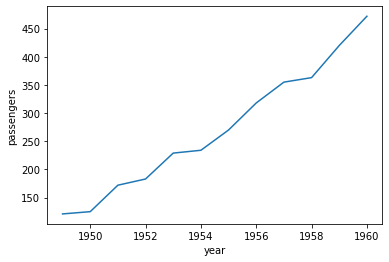

In [4]:
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")
plt.show()

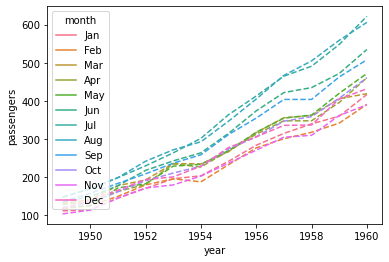

In [4]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month", linestyle='dashed')
plt.show()

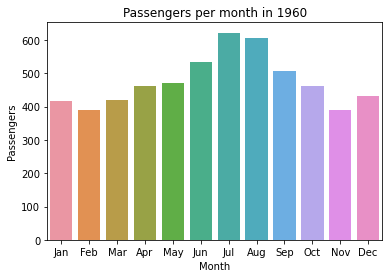

In [13]:
sns.barplot(data=flights.loc[flights['year']==1960], x='month', y='passengers')
plt.title('Passengers per month in 1960')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

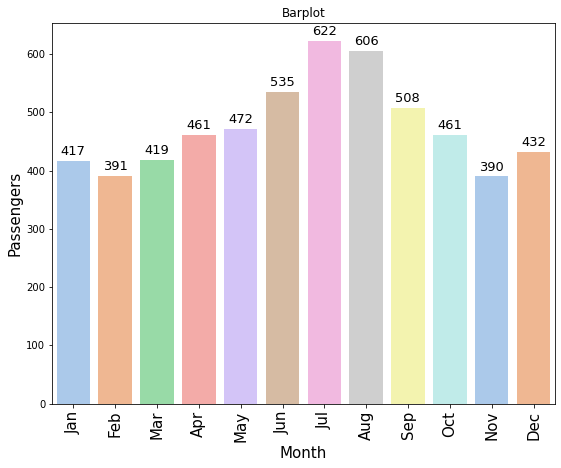

In [8]:
plt.figure(figsize=(9, 7))

ax = sns.barplot(data=flights.loc[flights['year']==1960], x='month', y='passengers', palette='pastel')

plt.xticks(rotation=90, fontsize = 15)

for p in ax.patches:
    #print(p)
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height()+10), fontsize = 13)
    #ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.1, p.get_height()+10), rotation = 45, fontsize = 13)
    
plt.title("Barplot")
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Passengers", fontsize = 15)
plt.show()

In [10]:
df = sns.load_dataset('tips')
male = df[df['sex'] == 'Male']
female = df[df['sex'] == 'Female']
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


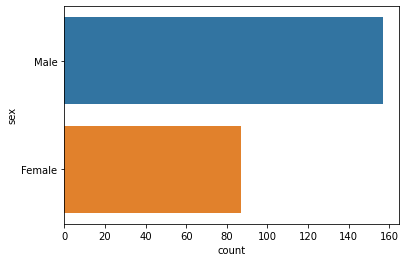

In [12]:
#sns.countplot(x=df.sex ,data=df)
sns.countplot(y=df.sex ,data=df)
plt.show()

In [36]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

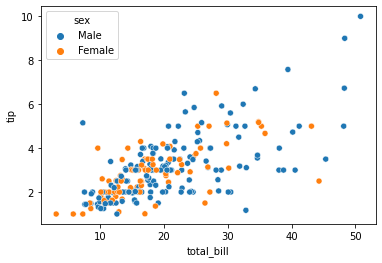

In [14]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex')
plt.show()

In [28]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

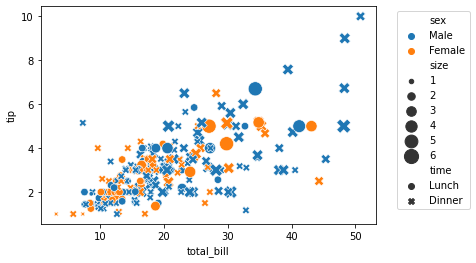

In [17]:
sns.scatterplot(
        data=df, x='total_bill', y='tip', hue='sex', 
        style="time", size='size', sizes=(20, 200)
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc = 2)
plt.show()

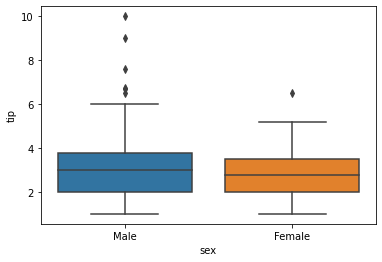

In [14]:
sns.boxplot(data = df,y = 'tip',x = 'sex')
plt.show()

In [42]:
df.groupby('time').sum()

,total_bill,tip,size
time,,,
Lunch,1167.47,185.51,164
Dinner,3660.30,546.07,463


In [43]:
pie_df = df.groupby('time').sum()
pie_df

,total_bill,tip,size
time,,,
Lunch,1167.47,185.51,164
Dinner,3660.30,546.07,463


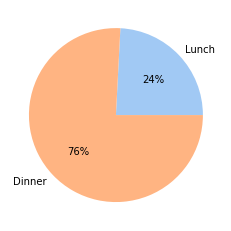

In [46]:
colors = sns.color_palette('pastel')[0:5]

plt.pie(x = pie_df['total_bill'], labels = pie_df.index, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='day', ylabel='Count'>

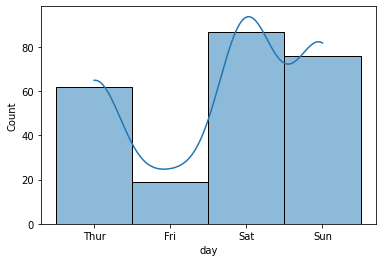

In [19]:
sns.histplot(data=df, x="day", kde=True)

<AxesSubplot:>

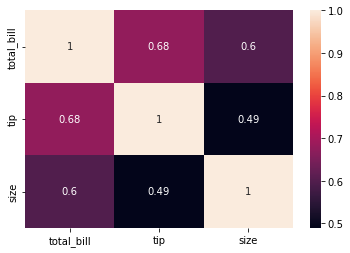

In [18]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

In [20]:
df_iris = sns.load_dataset("iris")
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

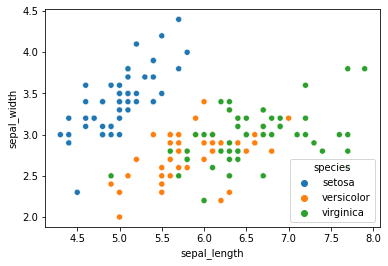

In [23]:
sns.scatterplot(data=df_iris,  x='sepal_length', y='sepal_width', hue='species') 

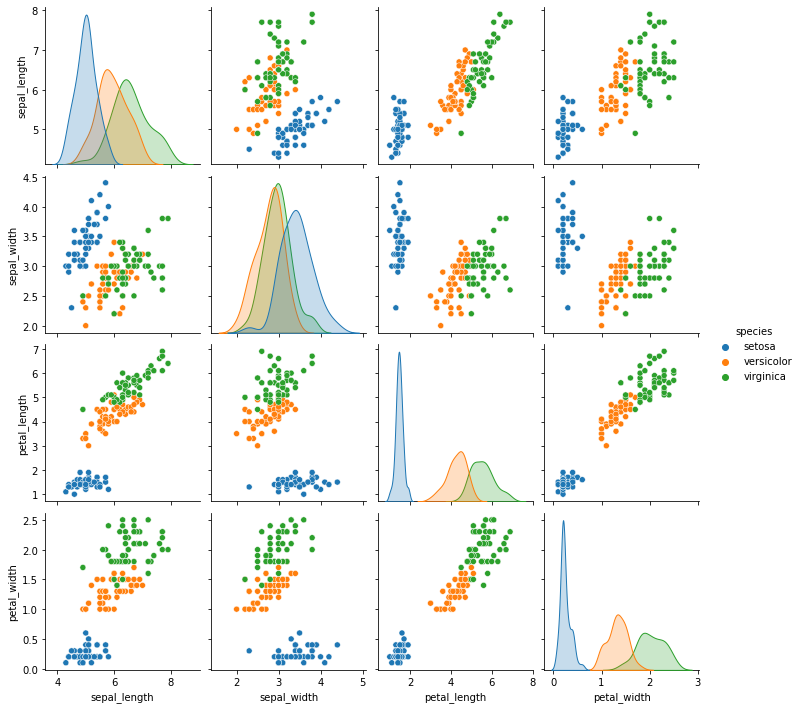

In [21]:
# Traçar relacionamentos aos pares em um conjunto de dados
sns.pairplot(df_iris, hue='species') 

<AxesSubplot:>

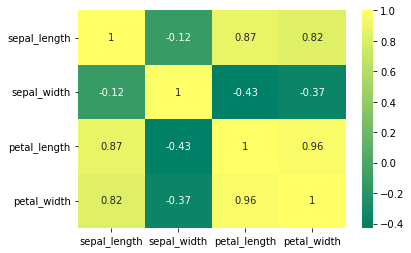

In [23]:
corr_matrix = df_iris.corr()
sns.heatmap(corr_matrix, annot=True,cmap='summer')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

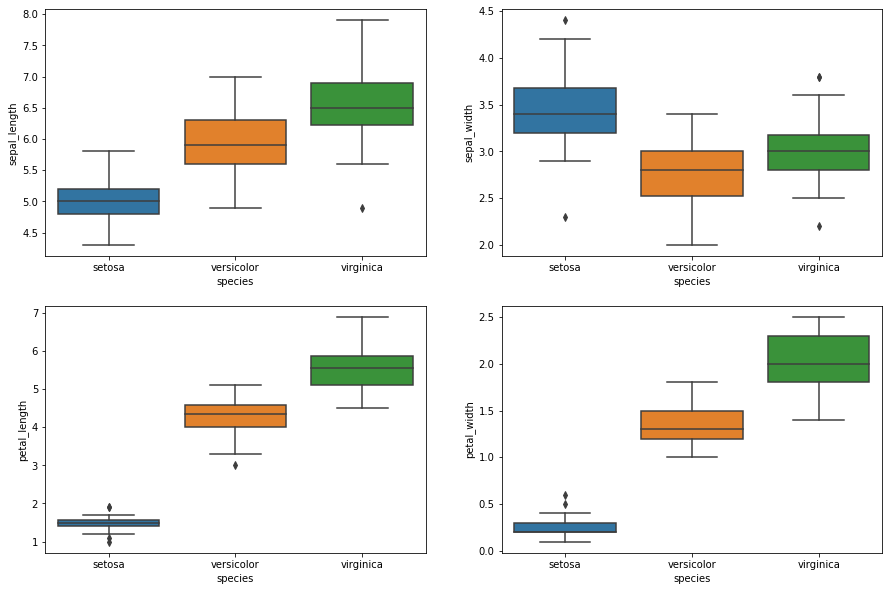

In [59]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

sns.boxplot(x='species',y='sepal_length',data=df_iris, ax=ax[0][0])
sns.boxplot(x='species',y='sepal_width',data=df_iris, ax=ax[0][1])
sns.boxplot(x='species',y='petal_length',data=df_iris, ax=ax[1][0])
sns.boxplot(x='species',y='petal_width',data=df_iris, ax=ax[1][1])

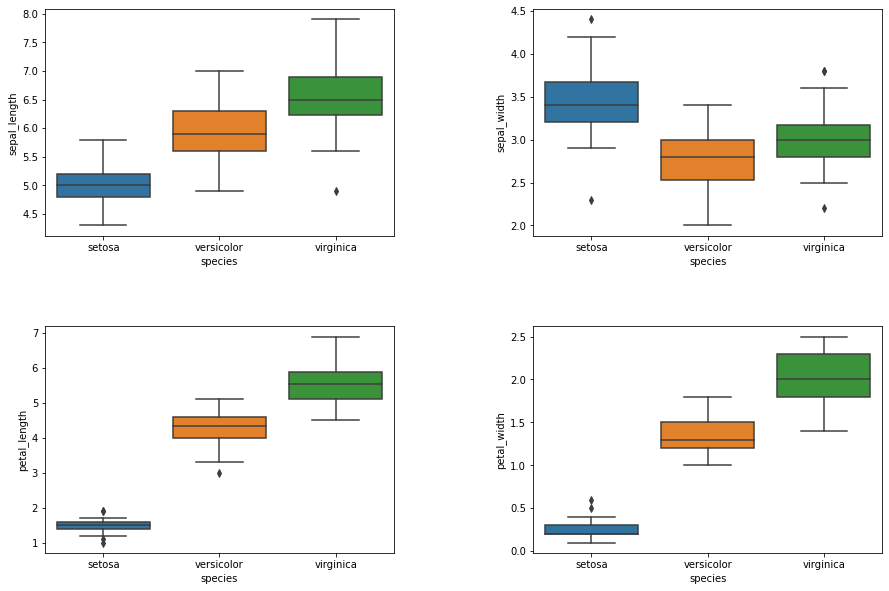

In [37]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plot1 = plt.subplot(2, 2, 1)
sns.boxplot(x='species',y='sepal_length',data=df_iris)

plot2 = plt.subplot(2, 2, 2)
sns.boxplot(x='species',y='sepal_width',data=df_iris)

plot3 = plt.subplot(2, 2, 3)
sns.boxplot(x='species',y='petal_length',data=df_iris)

plot3 = plt.subplot(2, 2, 4)
sns.boxplot(x='species',y='petal_width',data=df_iris)

plt.show()